# OKCupid Date-A-Scientist

*"In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance."*

In this project, we will explore data from the OKCupid online dating service. Using skills acquired from Codecademy's Data Scientist: Machine Learning career path, we will figure out a way to make sense of the multiple choice and short answers that OKCupid has collected in this data set.

## Project Scope

The first part of this project will explore the makeup of features of the dataset, or more specifically the column names, the data types of the columns, the values each column consists of, and how the individual values in each column are distributed in relation to each other. This could be helpful in determining whether they could serve as features in a machine learning model.

The second part of this project is solving an ML-solvable problem. For this section, I have chosen a question that comes to my mind when thinking about the nature of internet proliferation:

- Can you predict how long ago someone was online based on job, income and location?

## Part I

### Importing required libraries

The various libraries required for this project will be imported here.

In [240]:
# numpy and pandas libraries
import numpy as np
import pandas as pd

# matplotlib and sns libraries
import matplotlib.pyplot as plt
import seaborn as sns

# geopy library
#pip install geopy
from geopy.geocoders import Nominatim
import datetime

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

### Loading data

First, we will load the data into the primary dataframe and examine the head.


In [189]:
profiles = pd.read_csv("profiles.csv")
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Examining columns, data types, and data classifications

My first concern is the types of data recorded. The `dtypes` and `columns` of the dataset, as well as the `head` of each column are listed below:

In [190]:
# print column names
print(profiles.columns)

# print shape of dataset
print(len(profiles.columns))
print()

# print data types of each column
print(profiles.dtypes)
print()

# print head of each column....
for col in profiles.columns:
  print("Head of \'" + col + "\':")
  print(profiles[col].head())
  print()

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')
31

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             obje

It can clearly be observed that all but three of the columns are of the type "object."

All but 14 of the 31 columns represent categorical variables. Two (`height` and `income`) represent continuous variables. One column (`age`) is discrete. Ten of the columns are reserved for short essays, and the remaining column (`last_online`) is a date variable which can be treated as either continuous, discrete or categorical.

`.describe()` can provide further insight into the continuous variables.

In [191]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [192]:
profiles.shape

(59946, 31)

Three values in the height column are null.

### Visualizing the data

Much of the data contained in the is visualizable. Histograms of each non-categorical variable are shown below. 

Text(0, 0.5, 'Frequency')

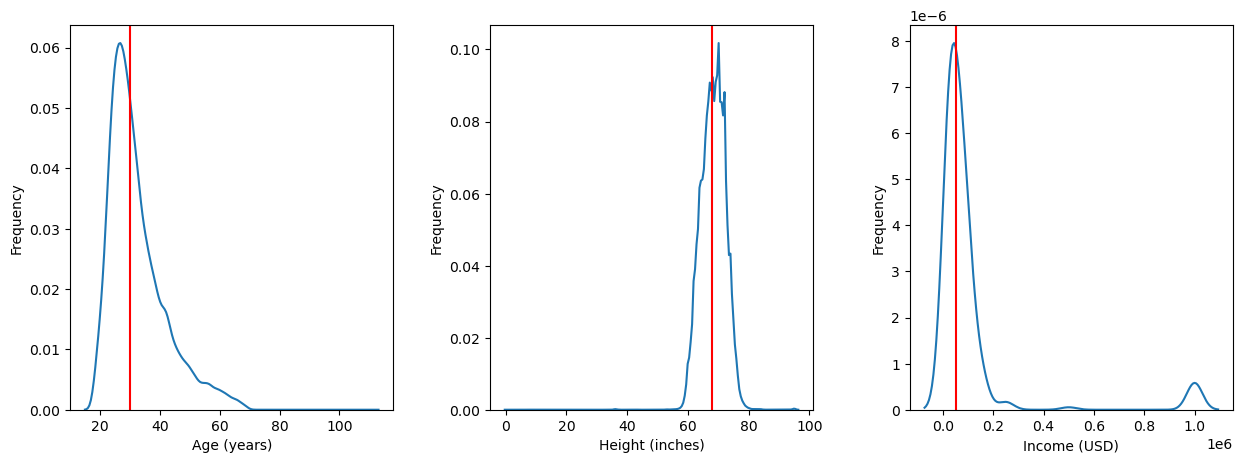

In [193]:
# grid and adjustment
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

# kdeplot for age
axes[0] = sns.kdeplot(ax=axes[0], data=profiles, x="age")
axes[0].set_xlabel("Age (years)")
axes[0].axvline(profiles['age'].median(), color='red')
axes[0].set_ylabel("Frequency")

# kdeplot for height
axes[1] = sns.kdeplot(ax=axes[1], data=profiles, x="height")
axes[1].set_xlabel("Height (inches)")
axes[1].axvline(profiles['height'].median(), color='red')
axes[1].set_ylabel("Frequency")

# kdeplot for income
# axes[2] = sns.histplot(ax=axes[2], data=profiles, x="income", binwidth=24000)
mask = profiles['income'] == -1
axes[2] = sns.kdeplot(ax=axes[2], data=profiles[~mask], x="income")
axes[2].set_xlabel("Income (USD)")
axes[2].axvline(profiles[~mask]['income'].median(), color='red')
axes[2].set_ylabel("Frequency")

We can see that the ages distribution is skewed to the left of its median (around 30), height is generally evenly distributed between 60 and 80 inches, and income is dominated by those that did not report it. An outlier ($1,000,000) is visible. Even with the null (-1) values removed, the graph is still skewed heavily toward the left, though the major peak is evenly distributed around the median.

m    35829
f    24117
Name: sex, dtype: int64


Text(0, 0.5, 'Drugs')

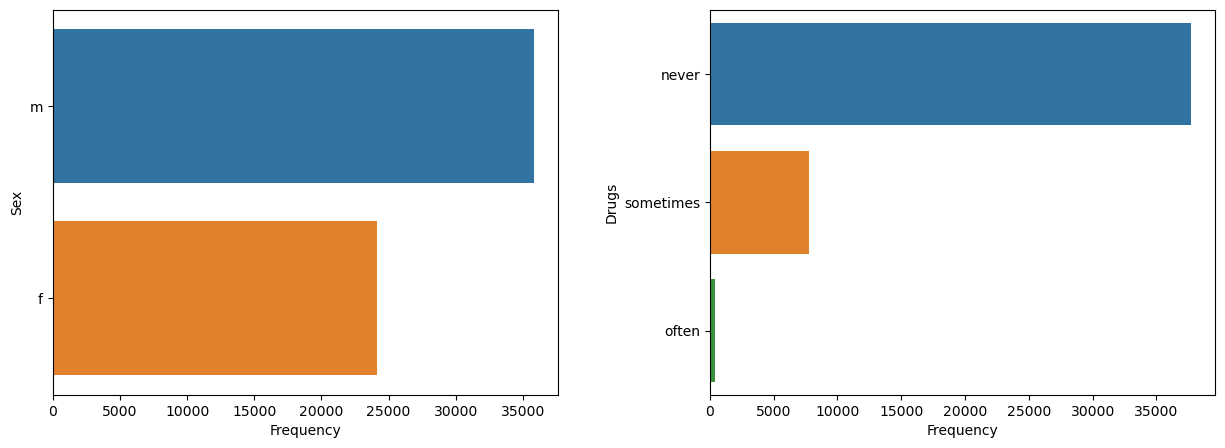

In [194]:
# grid and adjustment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3)

# countplot for sex
axes[0] = sns.countplot(ax=axes[0], data=profiles, y="sex")
axes[0].set_ylabel("Sex")
axes[0].set_xlabel("Frequency")

# value_counts for sex
print(profiles['sex'].value_counts())

# countplot for drugs
axes[1] = sns.countplot(ax=axes[1], data=profiles, y="drugs")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Drugs")

We can see that there are more men than women; nearly 60% of respondents are male according to `value_counts()`. The respondents tend to never used drugs.

Text(0, 0.5, 'Smokes')

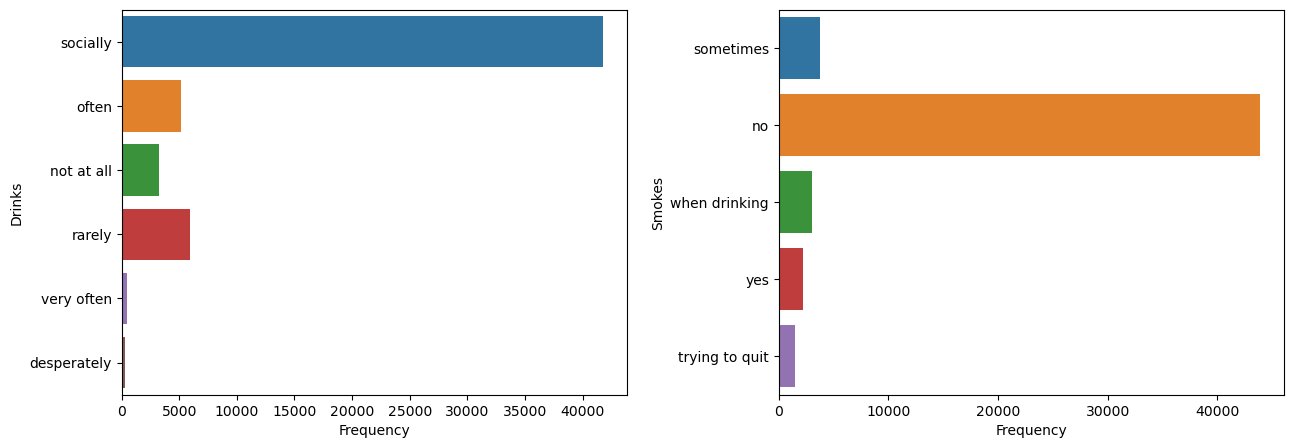

In [195]:
# grid and adjustment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# countplot for drinks
axes[0] = sns.countplot(ax=axes[0], data=profiles, y="drinks")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Drinks")

# countplot for smokes
axes[1] = sns.countplot(ax=axes[1], data=profiles, y="smokes")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Smokes")

The great majority of respondents drink socially and never smoke.

Text(0, 0.5, 'Education')

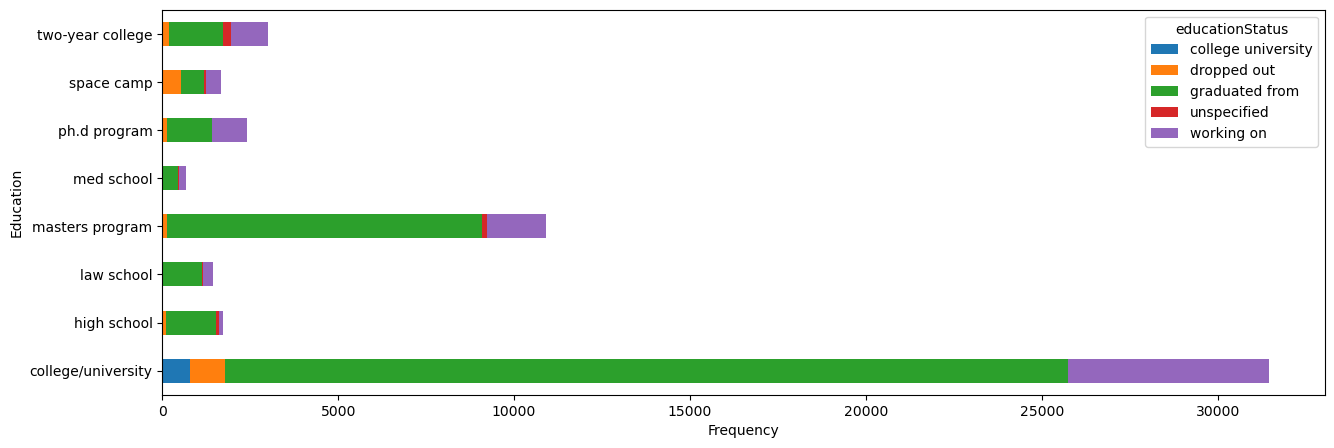

In [196]:
# grid and adjustment
fig, axes = plt.subplots(1, 1, figsize=(15, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

def convert_to_pivot(y, hue, df):
  return df.groupby([hue, y]).size().reset_index().pivot(columns=hue, index=y, values=0);

# augmentation for education
profiles['educationCleaned'] = profiles['education'].str.replace("/", " ")
profiles['educationStatus'] = profiles['educationCleaned'].str.split().str[:2].str.join(' ')
profiles['educationCleaned'] = profiles['educationCleaned'].str.split().str[-2:].str.join(' ')
profiles['educationCleaned'] = profiles['educationCleaned'].str.replace("e u", "e/u")
profiles['educationStatus'].where(profiles['educationCleaned'] != profiles['educationStatus'], "unspecified", inplace=True)

# countplot for education
axes = convert_to_pivot("educationCleaned", "educationStatus", profiles).plot(ax=axes, kind='barh', stacked=True)
axes.set_xlabel("Frequency")
axes.set_ylabel("Education")

The largest education category is college/university, followed by masters programs. Out of these users, most have graduated from their respective program. 

Text(0, 0.5, 'Body Type')

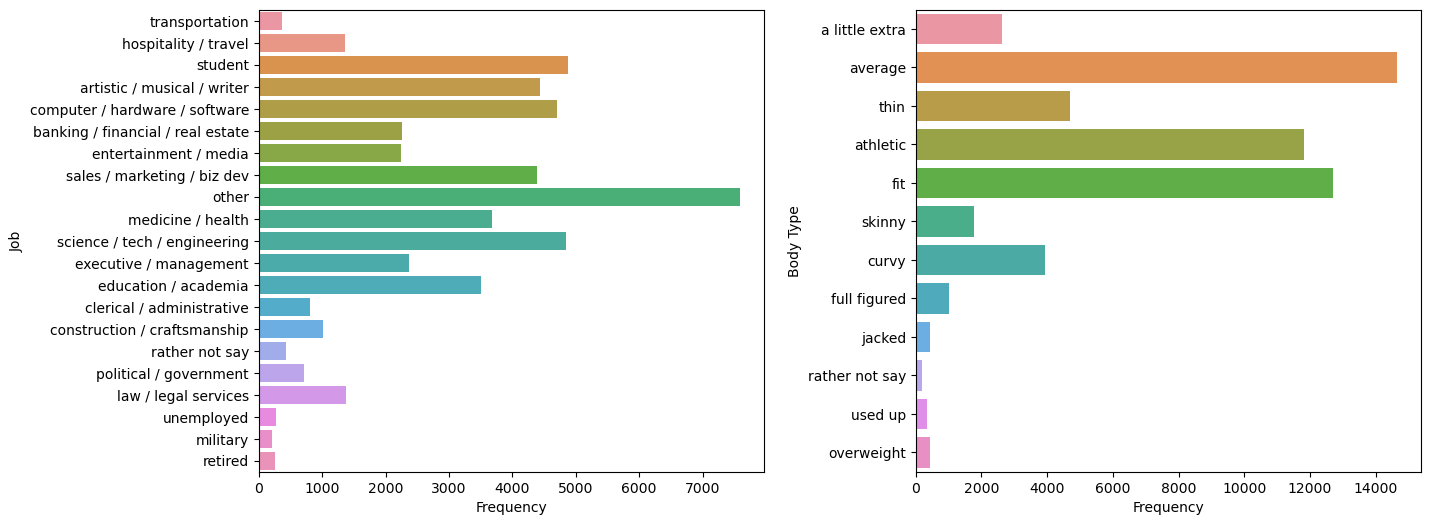

In [197]:
# grid and adjustment
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# countplot for job
axes[0] = sns.countplot(ax=axes[0], data=profiles, y="job")
# sns.countplot(ax=axes[0], data=profiles, y="education")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Job")

# countplot for body_type
axes[1] = sns.countplot(ax=axes[1], data=profiles, y="body_type")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Body Type")

Types of transportation are widely varied; in fact, "other" is the most popular option. Users most commonly work as students, as artists, in sales and marketing, in science and engineering, and in information technology. Users tend to describe their body type as "average," but also as athletic and fit, and to a lesser extent thin and curvy. This could probably be due to the attractiveness of these characteristics to the average person. 

In [198]:
# initialization of geolocator API
geolocator = Nominatim(user_agent="MyApp")

# conversion of locations into latitude/longitude
latlongs = []
i = 0
for location in profiles['location'].unique():
  print(str(i) + ": " + location)
  loc_obj = geolocator.geocode(location)
  if (isinstance(loc_obj, type(None))):
    print("lat/long not found")
    latlongs.append([np.NAN, np.NAN])
  else:
    latlongs.append([loc_obj.latitude, loc_obj.longitude])
  i += 1

0: south san francisco, california
1: oakland, california
2: san francisco, california
3: berkeley, california
4: belvedere tiburon, california
5: san mateo, california
6: daly city, california
7: san leandro, california
8: atherton, california
9: san rafael, california
10: walnut creek, california
11: menlo park, california
12: belmont, california
13: san jose, california
14: palo alto, california
15: emeryville, california
16: el granada, california
17: castro valley, california
18: fairfax, california
19: mountain view, california
20: burlingame, california
21: martinez, california
22: pleasant hill, california
23: hayward, california
24: alameda, california
25: vallejo, california
26: benicia, california
27: el cerrito, california
28: mill valley, california
29: richmond, california
30: redwood city, california
31: el sobrante, california
32: stanford, california
33: san pablo, california
34: novato, california
35: pacifica, california
36: lafayette, california
37: half moon bay, c

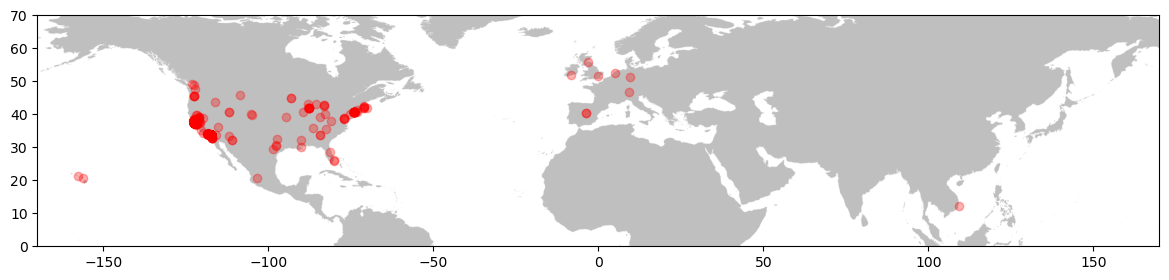

In [199]:
# utility list and function to ease the process of matching lat/long values to locations
l = list(profiles['location'].unique())
def latlong_finder(loc, ar):
  v = latlongs[l.index(loc)][ar]
  return v

# new columns for lat/long values
lat = lambda loc: latlong_finder(loc, 0)
long = lambda loc: latlong_finder(loc, 1)
profiles['latitude'] = profiles['location'].apply(lat)
profiles['longitude'] = profiles['location'].apply(long)

# mapping of latitude/longitude points on a map
plt.figure(figsize=(15, 3))
img = plt.imread("imagearea.png")
plt.imshow(img, extent=[-170, 170, 0, 70])
plt.scatter(profiles['longitude'], profiles['latitude'], alpha=0.3, color="red")
plt.xlim(-170, 170)
plt.ylim(0, 70)
plt.show()

Users are heavily concentrated in the continental United States, particularly California and the East Coast. Europe is also fairly represented, and a few outliers exist in Mexico, Vietnam, and Hawaii.

[Text(1305000000.0, 0, '2011-05-10'),
 Text(1315000000.0, 0, '2011-09-02'),
 Text(1325000000.0, 0, '2011-12-27'),
 Text(1335000000.0, 0, '2012-04-21'),
 Text(1345000000.0, 0, '2012-08-14')]

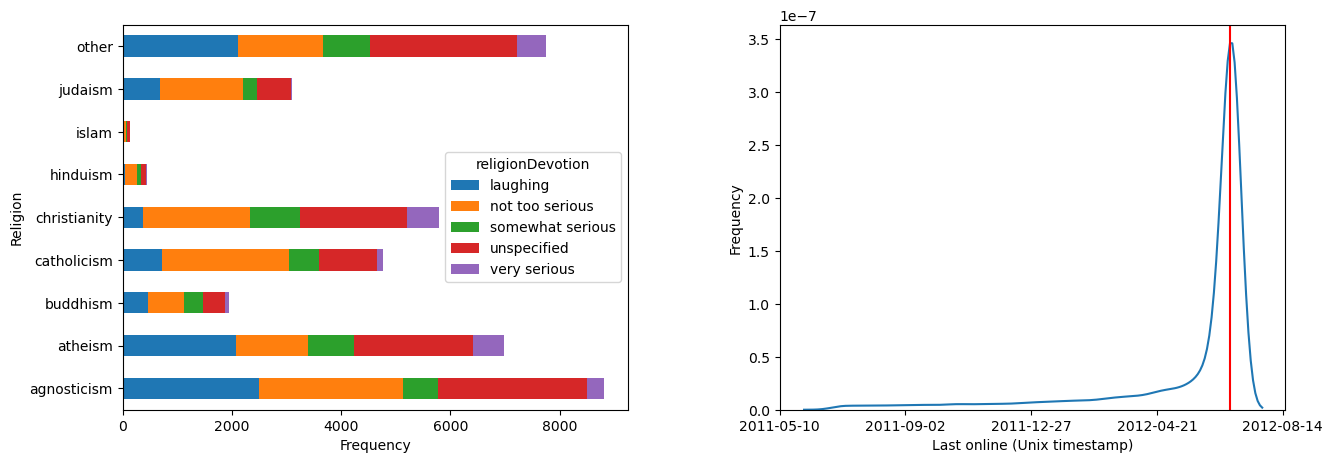

In [200]:
# grid and adjustment
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# augmentation for religion
profiles['religionCleaned'] = profiles['religion'].str.split().str.get(0)
profiles['religionDevotion'] = profiles['religion'].str.split().str[2:-2].str.join(' ')
profiles['religionDevotion'].where(profiles['religionDevotion'] != '', "unspecified", inplace=True)
profiles['religionDevotion'].where(pd.notnull(profiles['religionDevotion']), "unspecified", inplace=True)

axes[0] = convert_to_pivot("religionCleaned", "religionDevotion", profiles).plot(ax=axes[0], kind='barh', stacked=True)
#sns.countplot(ax=axes[0], data=dietdata, y="dietType", hue="dietRule")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Religion")

# augmentation for last_online
profiles["last_online_unix"] = profiles["last_online"].apply(lambda d: datetime.datetime.timestamp(datetime.datetime.strptime(d, "%Y-%m-%d-%H-%M")))

# kdeplot for last-online. The dates were converted to Unix timestamps in order to be used as a continuous variable.
axes[1] = sns.kdeplot(ax=axes[1], data=profiles, x="last_online_unix")
axes[1].set_xlabel("Last online (Unix timestamp)")
axes[1].axvline(profiles['last_online_unix'].median(), color='red')
x_ticks = axes[1].get_xticks()
xlabel = [datetime.datetime.fromtimestamp(int(x)).strftime('%Y-%m-%d') for x in x_ticks[::2]]
axes[1].set_xticks(x_ticks[::2])
axes[1].set_ylabel("Frequency")
axes[1].set_xticklabels(xlabel)

Users here are generally atheist and agnostic. "other" is also popular, indicating a range of religious diversity. Reflecting the American-centric nature of the responses, Christianity is also popular. And finally, users tend to have been last online around July 2012.

## Part II

I am fascinated with the proliferation of technology and how it impacts society. The way we use it today is almost inconcievable to someone from the era where these responses were taken, for better or for worse.

Still, by 2012, 83% of Americans used the internet. But that statistic does not tell the full story: around 2.5 million Americans still used AOL Dial-Up to connect by then. I feel that jobs, income, and location could have an impact on when a user was last online, since those were major factors in internet adoption and continue to influence how people use the internet.

### Augmenting the data

##### Preprocessing / Concentrating on US data

Much of the required augmentation of the dataset was already accomplished in pursuit of visualizing the data. 

However, null values should be dropped and jobs should be numerically encoded for the sake of model performance.

In [231]:
cols = ['last_online_unix', 'latitude', 'longitude', 'income', 'job']
df = profiles[~mask][cols].dropna()

df = pd.get_dummies(df, columns=['job'], prefix = ['job'])
print(df.shape)
df.head()

(11144, 25)


,last_online_unix,latitude,longitude,income,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
1,1.341020e+09,37.804456,-122.271356,80000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.340908e+09,37.870839,-122.272863,20000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
11,1.337721e+09,37.690483,-122.472670,40000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,1.339618e+09,37.779026,-122.419906,30000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
14,1.340974e+09,37.724930,-122.156077,50000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


We will now determine X and Y. 

Due to the dataset's concentration on the continental United States, I feel that it is best to focus solely on that country to avoid outliers.

We can see that the variables other than `job` are on wildly differing scales. To compensate, we will be using z-score normalization to better prepare the data for machine learning.

In [237]:
# determination of X and Y
df = df[(df['longitude'] >= -125) & (df['longitude'] <= -66) & (df['latitude'] >= 24) & (df['latitude'] <= 49)]

col_length = len(df.columns)

print(col_length)

X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

def normalize(col):
    return ((col-np.mean(col)) / np.std(col))
    #return ((col-np.min(col)) / (np.max(col) - np.min(col)))

X = X.apply(normalize)
print(df.shape)
X.head()

25
(11142, 25)


,last_online_unix,latitude,longitude,income,job_artistic / musical / writer,job_banking / financial / real estate,job_clerical / administrative,job_computer / hardware / software,job_construction / craftsmanship,job_education / academia,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
1,0.559604,0.155109,-0.007493,-0.111507,-0.321028,-0.183250,-0.136226,-0.340238,-0.181675,-0.265755,...,-0.0942,-0.400479,-0.133117,-0.089734,-0.079513,-0.290663,-0.309849,-0.312624,-0.112805,-0.095644
3,0.544131,0.323865,-0.008679,-0.416269,-0.321028,-0.183250,-0.136226,-0.340238,-0.181675,-0.265755,...,-0.0942,-0.400479,-0.133117,-0.089734,-0.079513,-0.290663,-0.309849,3.198727,-0.112805,-0.095644
11,0.106731,-0.134625,-0.166029,-0.314681,-0.321028,5.457014,-0.136226,-0.340238,-0.181675,-0.265755,...,-0.0942,-0.400479,-0.133117,-0.089734,-0.079513,-0.290663,-0.309849,-0.312624,-0.112805,-0.095644
13,0.367119,0.090464,-0.124477,-0.365475,-0.321028,-0.183250,-0.136226,-0.340238,-0.181675,-0.265755,...,-0.0942,-0.400479,-0.133117,-0.089734,-0.079513,3.440408,-0.309849,-0.312624,-0.112805,-0.095644
14,0.553296,-0.047056,0.083290,-0.263888,-0.321028,-0.183250,-0.136226,-0.340238,-0.181675,-0.265755,...,-0.0942,2.497011,-0.133117,-0.089734,-0.079513,-0.290663,-0.309849,-0.312624,-0.112805,-0.095644


##### Testing a standard Linear Regression model

In [238]:
val_size = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=val_size, random_state = 44)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

print(r2_score(Y_test, Y_pred))
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

-0.0009663382784848018


53975566748495.77

A standard LinearRegression model proves to be incredibly poor; the mean squared error is over 53 trillion. We can only hope that other regression models prove superior.

The following code explores Ridge, Lasso, and ElasticNet regression models, and attempts to see if they provide better results.

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.10435e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.16621e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=4.25944e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.952e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211:

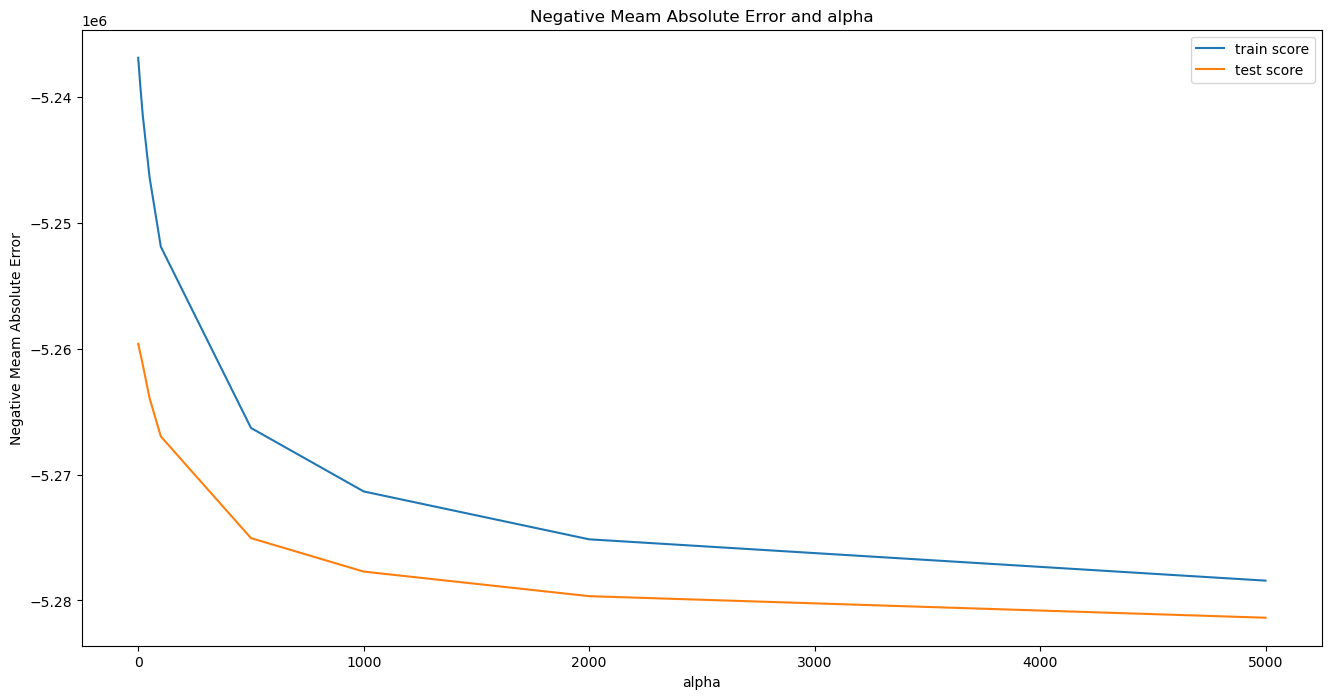

In [246]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000, 2000, 5000 ]}
ridge = Ridge()
folds = 5

grid_cv_model = GridSearchCV(estimator=ridge, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,Y_train)

cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200

# cv_results head
cv_results.head()

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [248]:
#seting alpha as 20
alpha = grid_cv_model.best_params_["alpha"]

# Initialising Ridge() with above alpha
ridge = Ridge(alpha=alpha)

#fitting model
ridge.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=3.29318e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge(alpha=0.0001)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+16, tolerance: 3.511e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+16, tolerance: 3.523e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+16, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+16, tolerance: 3.511e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+16, tolerance: 3.523e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.689e+16, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+16, tolerance: 3.562e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+16, tolerance: 3.511e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+16, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+15, tolerance: 3.533e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.883e+16, tolerance: 3.562e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+16, toleranc

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.984e+15, tolerance: 3.562e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.775e+16, tolerance: 3.511e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.978e+16, toleranc

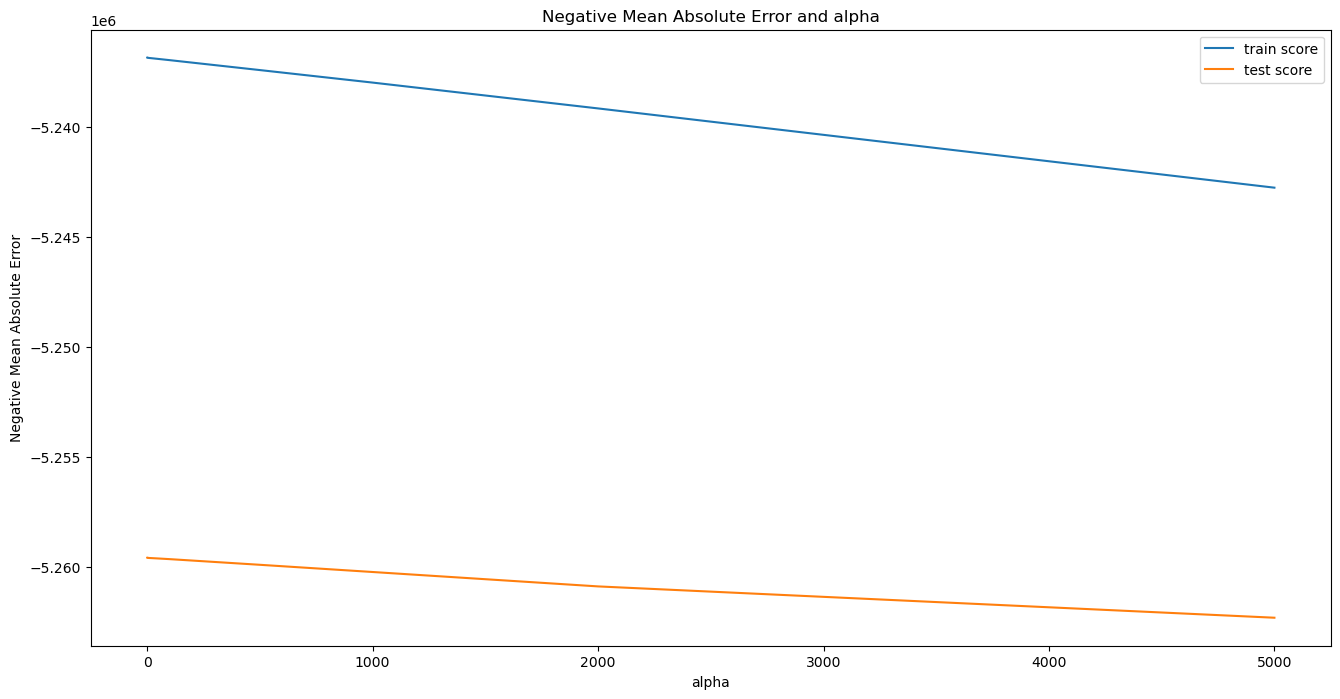

In [249]:
lasso = Lasso()

grid_cv_model = GridSearchCV(estimator=lasso, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,Y_train)

cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200

# cv_results head
cv_results.head()

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [250]:
alpha = grid_cv_model.best_params_["alpha"]

# Initialising Ridge() with above alpha
lasso = Lasso(alpha=alpha)

#fitting model
lasso.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.659e+16, tolerance: 4.413e+13
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0001)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.739e+17, tolerance: 3.511e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.746e+17, tolerance: 3.523e+13
  model = cd_fast.enet_coordinate_descent(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.740e+17, toleranc

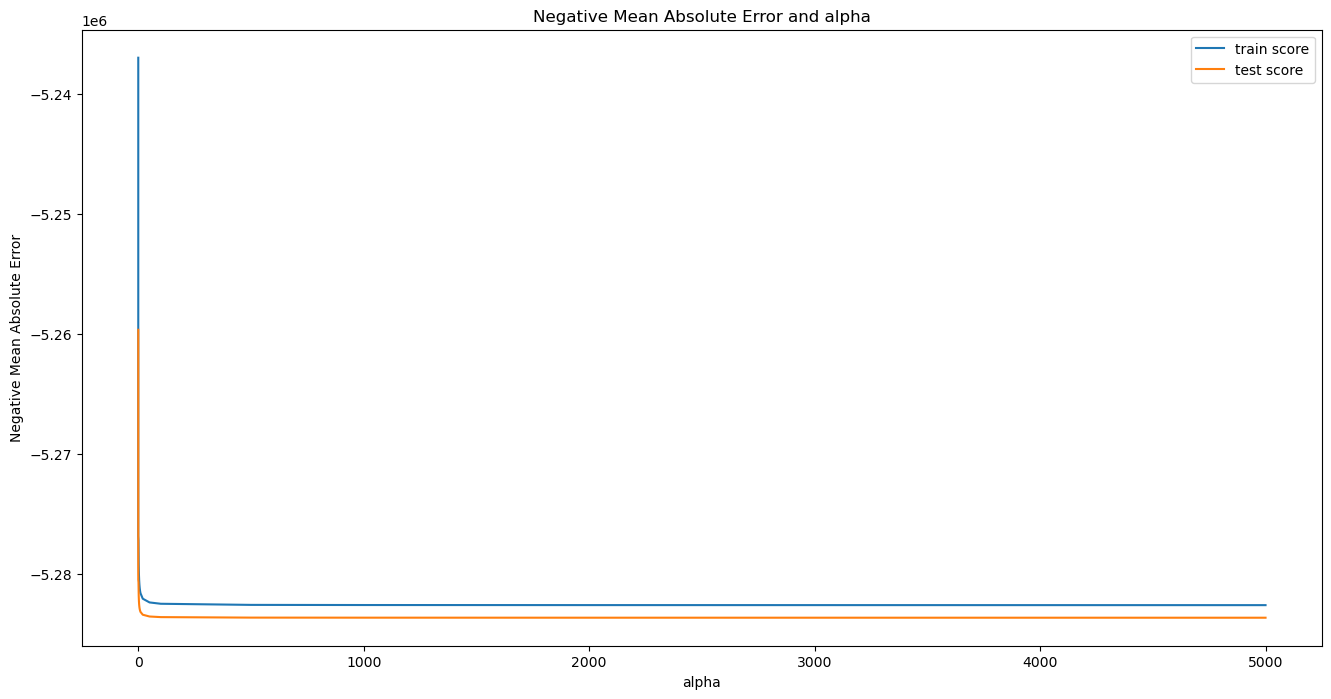

In [251]:
elasticnet = ElasticNet() 

grid_cv_model = GridSearchCV(estimator=elasticnet, param_grid=params, scoring='neg_mean_absolute_error', cv=folds, return_train_score=True, verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,Y_train)

cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200

# cv_results head
cv_results.head()

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Mean Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [255]:
alpha = grid_cv_model.best_params_["alpha"]

# Initialising Ridge() with above alpha
elasticnet = ElasticNet(alpha=alpha)

#fitting model
elasticnet.fit(X_train,Y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+17, tolerance: 4.413e+13
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.0001)

In [259]:
pred_by_lasso =  lasso.predict(X_test)
pred_by_ridge = ridge.predict(X_test)
pred_by_elasticnet = elasticnet.predict(X_test)


# printing RMSE for all 3 techniques
print(f'Lasso RMSE: {np.sqrt(mean_squared_error(Y_test,pred_by_lasso))}')
print(f'Ridge RMSE: {np.sqrt(mean_squared_error(Y_test,pred_by_ridge))}')
print(f'ElasticNet RMSE: {np.sqrt(mean_squared_error(Y_test,pred_by_elasticnet))}')
print(f'Standard Linear RMSE: {np.sqrt(mean_squared_error(Y_test,Y_pred))}')

Lasso RMSE: 7346806.567911648
Ridge RMSE: 7346806.547671465
ElasticNet RMSE: 7346721.858337413
Linear  RMSE: 7346806.568060423


Using very helpful code shamelessly stolen from `https://www.kaggle.com/code/mukeshmanral/advance-linear-regression-gridsearchcv-hpt-basic`, we can see the littany of errors that these models provide, and that they produce similarly horrible results. Safe to say, that according to the work done here, you cannot easily predict when someone was last online from these factors.

### Looking forward

Looking forward, we can look to K nearest neighbors regressors to further explore this problem, but this is outside the scope of this project, and quite frankly, my tolerance.